
# Model eigenvalues and impulse response  

Eigenvalues play a crucial role in the dynamics of models, encapsulating the adjustment process within a model. Their sign and magnitude dictate whether a model will stabilize, diverge after a disturbance, or if such a disturbance will induce oscillations.

In the case of a macromodel, which is effectively a system of **difference** equations, the eigenvalues of the coefficient matrix determine whether the system is stable, marginally stable, or unstable. If all the eigenvalues have negative real parts, then the system is stable and will converge to a steady state over time. If at least one eigenvalue has a positive real part, then the system is unstable, and the solutions will diverge over time.  

Unfortunately, in the case of non-linear systems of equations (like most WB models), the value of eigenvalues and eigenvectors are nto unique and depend on the level of model variables. To calculate the eigenvalues and eigenvectors of the system at a given point in time, is first linearized around the values of the solution at that moment. As a result it is not possible just inspect the eigenvalues and eigenvectors and determine whether a system is stable for all values of all variables. Definitive statements about the local stability of a model can be made, but not its global stability.

The stability, marginal stability, or instability of the system depends on the both the levels of the variables in the system as well as the coefficients of the system of equations.

This said, the Modelflow library provides a comprehensive set of tools for calculating a model’s eigenvalues, facilitating the diagnosis of a model's local stability and identifying potential sources of instability.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [3]:
# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

## Load the model 

In [4]:
mpak,bline = model.modelload('..\models\pak.pcim', 
             alfa=0.8,run=True,keep= 'Baseline',start=2023, end=2100)
mpak.basedf = bline

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


## Make some scenarios
To provide insight into how shocks impact the model results each scenario shocks the oilprice in 2025. The impulse response function then illustrates the dynamic response of the model. 

In [5]:
for oilshock in [0.01 ,5. ,10. ]: 
    oilshockdf = bline.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    _ = mpak(oilshockdf,2023,2100,keep=f'${oilshock} increase in oil prices 2025',alfa=0.7) 

:::{index} single: modelflow; .newtondiff() method
:::
:::{index} single: modelflow; .eigenvalues_plot() method
:::

:::{index} single: model derivatives
:::

:::{index} single: impulse response
:::

:::{index} single: eigenvalues and eigenvectors
:::

:::{index} single: modelflow; eigenvalues and eigenvectors
:::
## `.eigenvalues_plot()` Display polar diagram of eigenvalues
The .eigenvalues_plot() method first calculates the eigenvalues over the current time frame, then plots a set of polar diagram of the eigenvalues for selected years. 

Inspection of the polar diagrams can reveals potential sources of model instability.

Eigenvalues that appear along the zero axis have real roots and are stable.

Eigenvalues that are less than one (whether or not they have imaginary roots) are stable. Imaginary roots less than one are indicative of a tendency toward non-explosive oscillation in some elements of the model.

Inspection of the polar diagrams reveals indicates that most of the eigenvalues are less than one, and that those that have unreal roots (those that appear off of the 0 degree line), only a few have imaginary roots outside of the unit circle which could be a source of model uncertainty (these are hard to see in the figure, but are identified below).
  

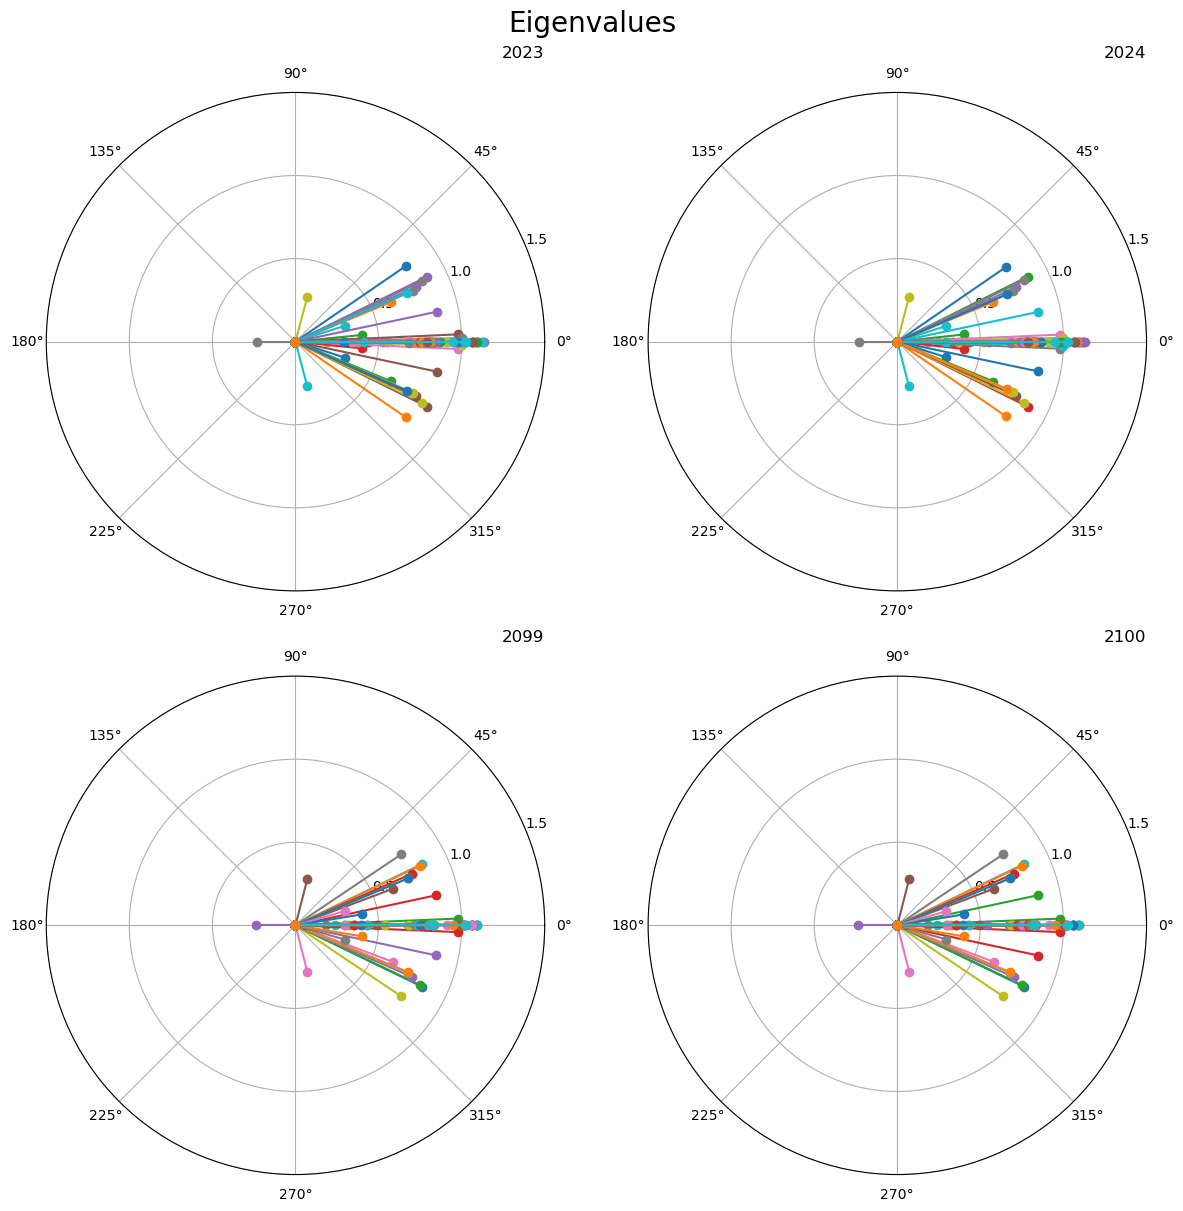

In [11]:
fig = mpak.eigenvalues_plot(periode=[2023,2024,2099,2100],size = (6,6));

```{note}
fig can be exportet to file with:
 >fig.savefile('polar.pdf')  
 
If another format then pdf is needed, `.pdf` can be changed to ´.svg|.png|.eps|.jpeg´.
```


Inspection of the polar diagrams reveals indicates that for the years shown that for the Pakistan model: 
 - There are real eigenvalues that are larger than 1, suggesting the potential for an explosive response to some shocks. 
 - There are a few instances where the eigenvalues have imaginary roots and are at our outside the unit circle, indicating a response that is both potentially explosive and oscillating. 

 Nevertheless, for the explosion and oscillation effects to be significant, they need to persist over several years, which means the occasional occurrences might not have substantial effects.

## the method `.eigenvalues_show()` Interactive exploration of eigenvalues and vectors

The method `.eigenvalues_show()` provides an interactive interface to the analysis of models eigenvalues and vectors. It generates and displays a polar plot of eigenvalues and their corresponding eigenvectors for any year. 

Users can interact with the plot via:
* a dropdown for year selection
* a slider for eigenvalue selection, and 
* a button to toggle additional plot details. 

The polar plot dynamically updates to reflect the selected eigenvalue, displaying its magnitude and phase. Additional information about associated eigenvectors are also displayed.

In addition, the `open plot widget` button will generate a diagram of the  impulse function  response of the variables that 
contribute most to the eigenvector corresponding to the selected eigenvalue.  
    


In [7]:
mpak.eigenvalues_show() 

```{image} eigenvalue_show.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

The plot widget 

```{image} showwidget.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

The impulse response for the one variable in the first Eigenvector

```{image} chart.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

## Impulse response 
The impulse response functions can also be visualized with the `.keep_plot` function. 

Below, observe the impulse response for selected variables. Initially, we present the response for the maximum projection period to illustrate long-term behavior, followed by a shorter period to highlight oscillations in the short run.

For many variables, the response amplifies over the long run, consistent with real eigenvalues above 1. Similarly, some variables show a diminishing oscillation, corresponding with the presence of eigenvalues with imaginary components.


### Long run absolute impulse response functions

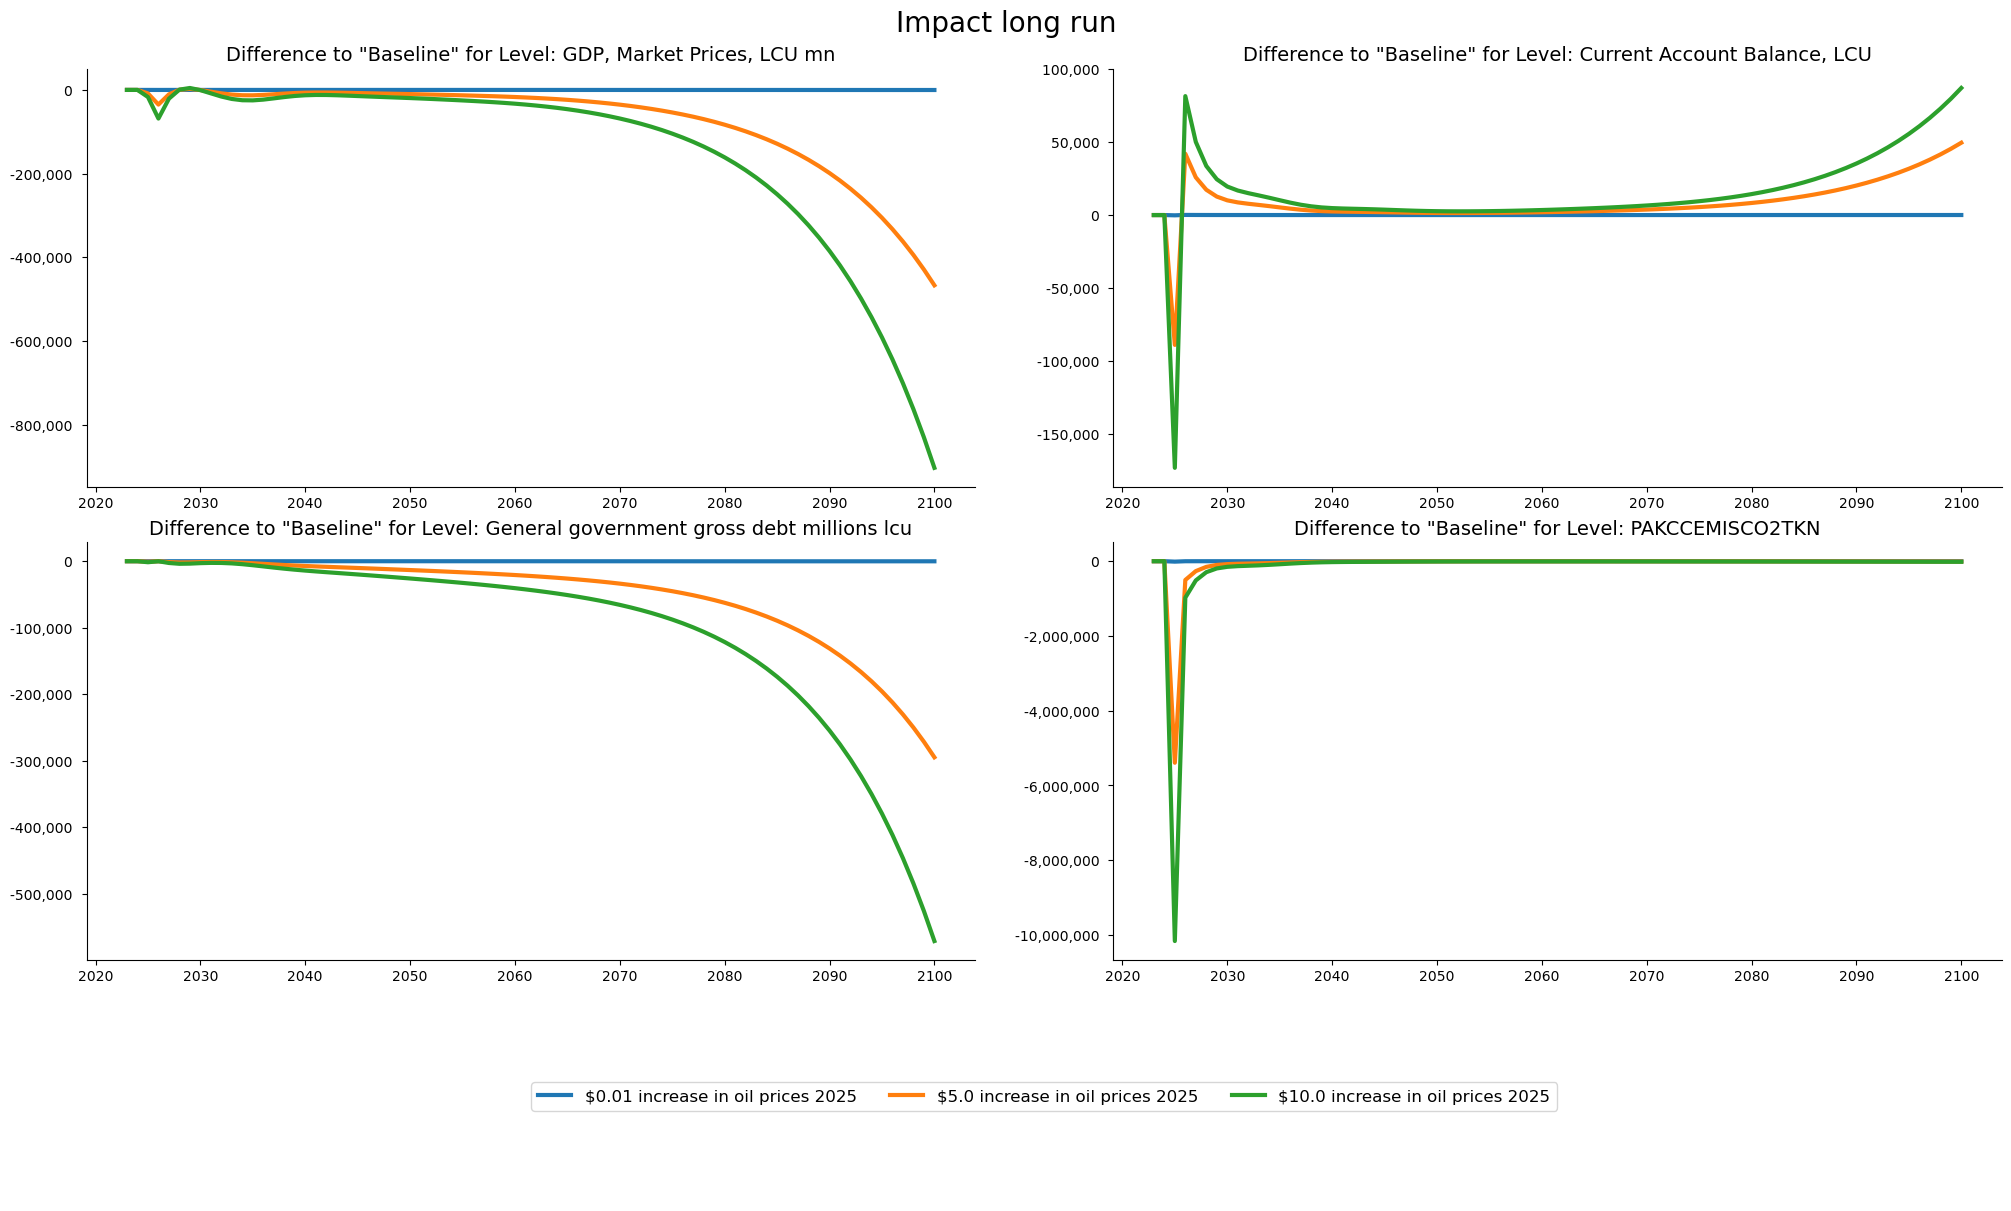

In [8]:
mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',
diff=True,start=2023,end=2100,samefig=1,legend=1,title='Impact long run');

### Long run relative impulse response functions

In interpreting this, it's crucial to acknowledge that the local price level in the baseline grows significantly. Observing the percentage difference from the baseline reveals that measured in this way the response does not explode. So the real impact of the impulse does not explode. 

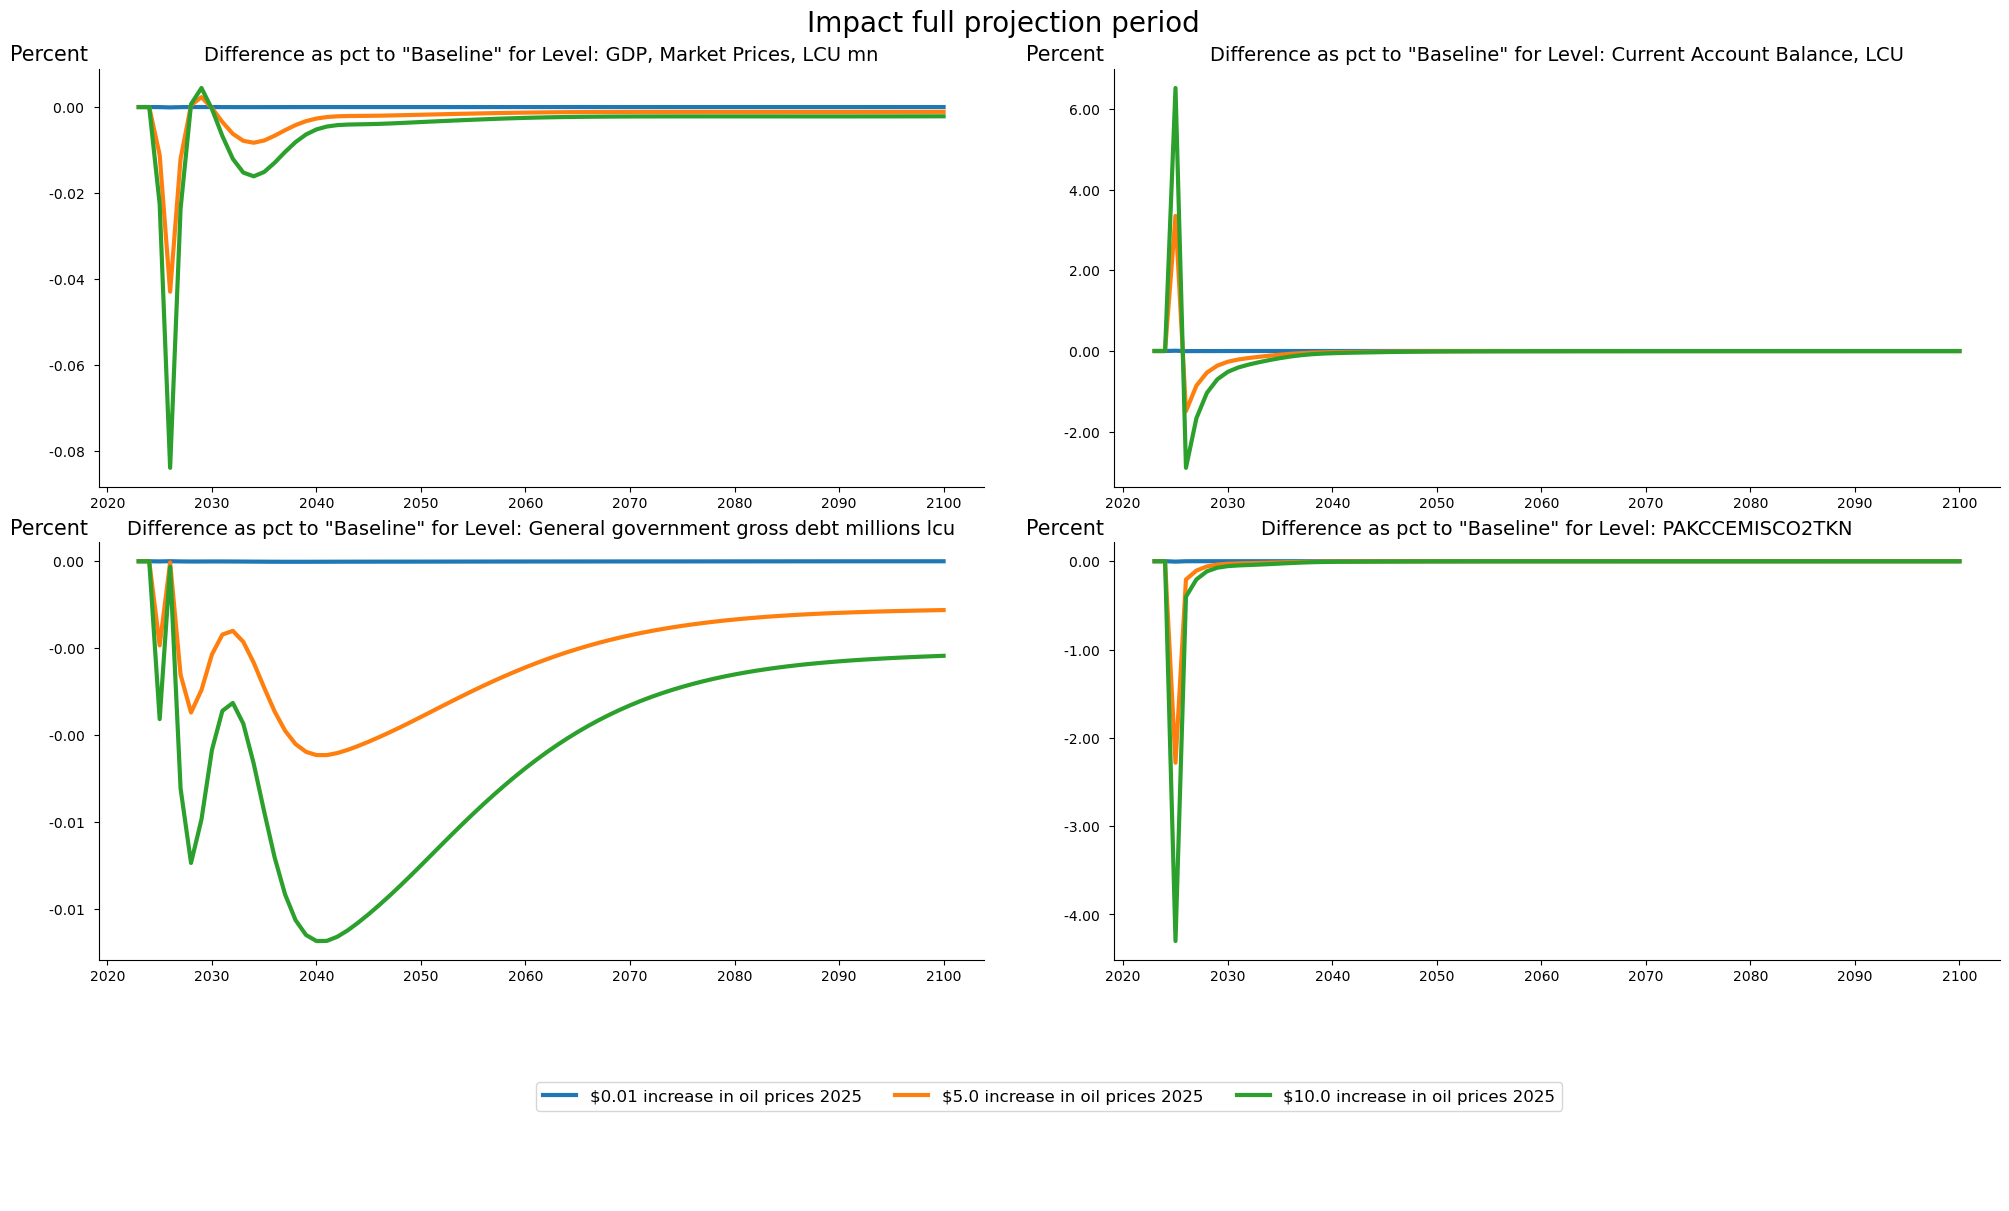

In [9]:
mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',
diffpct=True,start=2023,end=2100,samefig=1,legend=1,title='Impact full projection period');

### Short  run

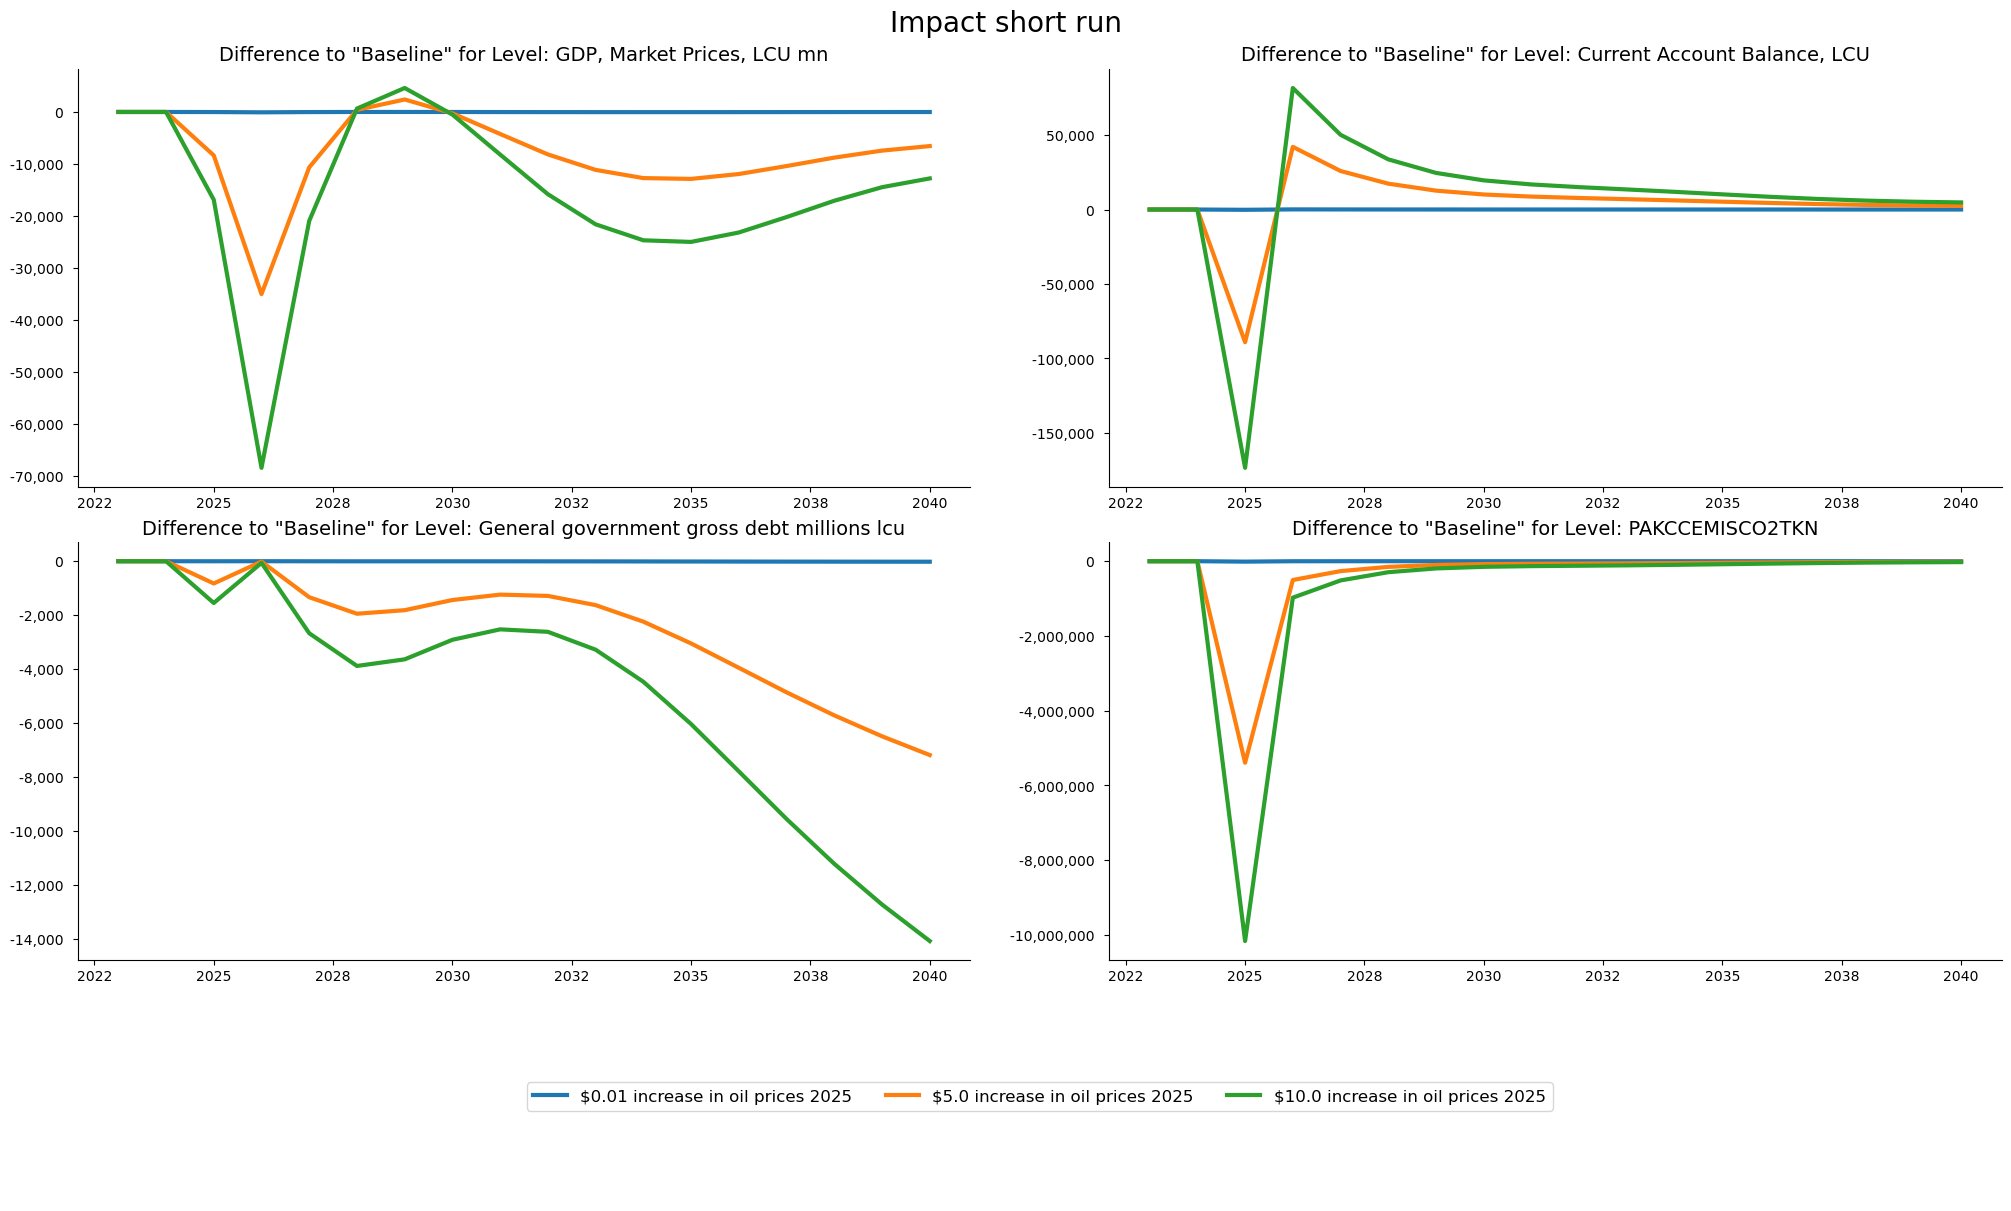

In [10]:
 mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN'
,diff=True,start=2023,end=2040,samefig=1,legend=1,title='Impact short run');

## Summary:

Eigenvalues eigenvectors describe the dynamic stability of a model, while impulse responses functions give a clean representation of the stability and dynamic behavior of a dynamic of individual variables in the model. 

Key considerations include:

- **Eigenvalues and Eigenvectors**: Eigenvalues and eigenvectors are useful for assessing the system's stability. Eigenvalues highlight the system's potential for growth, decay, or oscillation, while eigenvectors determine the direction of these dynamic changes.

- **Impulse Response Functions**: showcase the dynamic behavior of individual behaviors both as concerns long-term trends and short-term oscillations. This method provides an understanding of how variables respond to external shocks.

- In a macro model, while many variables are unstable in levels.  For example the price level in a macro model is undetermined and GDP is unbounded in the long run, IRF expressed as a percent of baseline values speak to the extent to which the model will return to its earlier equilibrium when disturbed.

- For example, in the Pakistan model some nominal variables appear to exhibit an exploding impulse response. However, this primarily reflects price developments. When measured in relative terms, the impulse response does not explode but approaches zero.

- Finally in a macro model instability is not necesarily a bas thing.  For example, a model may exhibit unstable debt dynamics that are a real reflectioon of the unsuistainability of fiscal policy


## Appendix: Compainion matirix 

### A model:

A normalized model with:

 - $\textbf n$ number of endogeneous variables
 - $\textbf k$ number of exogeneous variables 
 - $\textbf r$ max lag of endogeneous variables 
 - $\textbf s$ max lag of exogeneous variables 
 - $t$ time frame (year, quarter, day second or another another unit)
 
can be written:

\begin{eqnarray}
y_t^1 & = & y_t^2...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
y_t^2 & = & y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
y_t^n & = & y_t^1...,y_{t}^{n-1}...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}



Written in matrix notation where  $\textbf{y}_t$ and $\textbf{x}_t$ are vectors of endogenous/exogenous  variables for time t

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}( \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The functions are normalized, meaning: 

- Each endogenous variable is on the left hand side one time - and only one time.
- An endogenous variable without lags can **not** be on the right hand side in an equation, which has the variable on the left hand side. 

### The derivatives
We can express the matrices of derivatives with respect to the endogenous and exogenous variables like this: 


\begin{eqnarray*}
A & = & \frac{\partial F}{\partial y_t^T} \\ \\
E_i & = & \frac{\partial F}{\partial y_{t-i}^T } \hspace{5 mm} i=1, \cdots , r\\  \\
F_j & = & \frac{\partial F}{\partial x_{t-j} ^T} \hspace{5 mm} j=0, \cdots , s\\  \\
\end{eqnarray*}



:::{index} Stability; The companion matrix
:::

###  Constructing the companion matrix
To calculate the effect of small perturbations around a solution the derivative matrices can be used.

For simplicity a system with $r$ (max lag of endogenous variables) of 2 and $s$ (max lag of exogenous variables)  of 1 we have the linearized model:

$\Delta \textbf{y}_t = \textbf{A}\Delta  \textbf{y}_{t} + \Delta E_1 \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} +  E_3 \Delta  \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}$


Rearranging the equation to isolate $\Delta \textbf{y}_{t}$ on the left side:

$(\mathbb{I}-\textbf{A}) \Delta \textbf{y}_{t} = E_1 \Delta \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} + \Delta E_3 \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}$

$\Delta \textbf{y}_{t} = (\mathbb{I}-\textbf{A})^{-1} E_1 \Delta \textbf{y}_{t-1} + (\mathbb{I}-\textbf{A})^{-1} \Delta E_2 \textbf{y}_{t-2} + (\mathbb{I}-\textbf{A})^{-1} \Delta E_3 \textbf{y}_{t-3} + (\mathbb{I}-\textbf{A})^{-1} F_0 \Delta x_t +  (\mathbb{I}-\textbf{A})^{-1} F_1 \Delta x_{t-1}$

This is a 3th order system of difference equations. In order to be able to find the gain stability of the system it has to be rewritten as 1st order system of difference equations. That is a system with only one lag. Fortunately there is 
a standard way to do this. It runs as follow: 


Using the state vector:
$\textbf{z}_t = \begin{bmatrix} \textbf{y}_t \\ \textbf{y}_{t-1} \\ \textbf{y}_{t-2} \end{bmatrix}$ and $\textbf{w}_t = \begin{bmatrix} \textbf{x}_t \\ \textbf{x}_{t-1} \end{bmatrix}$


The system can be expressed as:

$\Delta \textbf{z}_{t} = \underbrace{\begin{bmatrix} (\mathbb{I}-\textbf{A})^{-1}E_1 & (\mathbb{I}-\textbf{A})^{-1}E_2 & (\mathbb{I}-\textbf{A})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}}_{\textbf{C}} \Delta \textbf{z}_{t-1} +
\left[\begin{matrix}(\mathbb{I}-\textbf{A})^{-1} F_{0} & (\mathbb{I}-\textbf{A})^{-1} F_{1}  \\{0} & {0}  \\{0} & {0} \\\end{matrix}\right]
\Delta \textbf{w}_t$

This system is a first order system - and the stability can be evaluated using the matrix:

$\textbf{C} = \begin{bmatrix} (\mathbb{I}-\textbf{A})^{-1}E_1 & (\mathbb{I}-\textbf{A})^{-1}E_2 & (\mathbb{I}-\textbf{A})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}$


also known as **the companion matrix** 

If the systematic in construction the companion matrix with max lag endogenous variable of 2 can be extended to any numbers of lags. 

### Stability and the eignvalues of the companion matrix

The dynamic behavior can be 
evaluated by looking at the eigenvalues $\textbf{e}_{t}$ of the companion matrix $((I-\bar A)^{-1}\bar E )$. Note that $\textbf{e}_{t}$ can are complex numbers.

 - If all $\lvert \textbf{e}_{t} \lvert < 1$ the system will converge. 
 - If at least one of the eigenvalues is larger than one, the system will amplify. 
 -  If at least one $\textbf{e}_{t}$ has an imaginary part the system will oscillate 
    - dampened if all $\lvert \textbf{e}_{t} \lvert < 1$ or 
    - amplifying  if one $\lvert \textbf{e}_{t} \lvert > 1$.

The eigenvalues and associated eigenvectors of a model can be calculated using the method `.get_df_eigen_dict()`, which returns a dictionary where the key is the year and the value is a dataframe the first row of which is the eigenvalues of the model in that year and the following rows are the eigenvectors. 


### Companion matrix in modelflow
To construct the companion matrix and calculating the eigenvalues and eigenvectors modelflow goes through a number of steps:  
 - finding expressions for all partial derivatives with respect to endogeneous variables
 - creating a model to calculate the partial derivatives. 
 - using this model calculate all partial derivatives for all lags
 - use the calculated partial derivatives to construct a companion matrix for all year
 - calculate the eigenvalues and eigenvectors. 
 
 In modelflow these steps are performed in a special class `newton_diff`- as is was constructed to enable solving the model using the newton method. The model class (from which this notebook has the instance `mpak` wraps the relevant functions. These are: 
 
- `.get_eigenvalues` returns a dictionary where the key is the year and the value is a dataframe containing s the eigenvalues of the model in that year.
- `.get_eigenvectors` returns a dictionary where the key is the year and the value is a dataframe the first row of which is the eigenvalues of the model in that year and the following rows are the eigenvectors. 
- `.eigenvalues_show` An interactive widget to display eigenvalues
- `.eigenvalues_plot` Returns a polar plot of the eigenvalues in a selected year 
- `.get_eigen_jackknife_df` Compute and cache eigenvalues with each endogenous variable excluded one at a time. Returns a tall dataframe with the results
- `.jack_largest_reduction`   Identifies the largest reduction in eigenvalue magnitude for a specified period
        and optionally focuses on eigenvalues with imaginary parts
- `.jack_largest_reduction_plot` Creates an interactive Plotly plot to visualize the reduction in eigenvalue magnitude across different exclusions 
- `.get_newton` Returns an instance of newton_diff class which is used for the eigenvalue calculations. 
 

Using some of these functions may require careful inspection of the help files and an understanding of the theory behind. 



When eigenvalues has been calculated once for a model the results are stores in 
a instance of the class `newton_diff`class. The instalse is called  `.stability_newton`and the calculations are not repeated every time the eigenvalues are used. 
